Data Cleaning for our data set, derived from data found at:
https://nces.ed.gov/ipeds/use-the-data

Authors:
- Tina Jin
- Virginia Weston
- Jeffrey Bradley
- Taylor Tucker

Import Statements

In [19]:
import numpy as np
import pandas as pd

Importing the dataset as a Pandas DataFrame.

In [20]:
df = pd.read_csv("./school_data.csv")
print(df.head())
columns = df.columns

   UnitID     Institution Name  Carnegie Classification 2018: Basic (HD2019)  \
0  138600  Agnes Scott College                                            21   
1  168546       Albion College                                            21   
2  210571     Albright College                                            21   
3  210669    Allegheny College                                            21   
4  217624     Allen University                                            21   

   Number of students receiving a Bachelor's degree (DRVC2019)  \
0                                              208.0             
1                                              310.0             
2                                              398.0             
3                                              382.0             
4                                               61.0             

   Percent of full-time first-time undergraduates awarded any financial aid (SFA1819)  \
0                                

Printing the column name and the number of null data points to get a good idea of what we are working with.

In [21]:
for c in columns:
    print(c, df[c].isna().sum())

UnitID 0
Institution Name 0
Carnegie Classification 2018: Basic (HD2019) 0
Number of students receiving a Bachelor's degree (DRVC2019) 1
Percent of full-time first-time undergraduates awarded any financial aid (SFA1819) 9
Average amount of federal  state  local or institutional grant aid awarded (SFA1819) 9
Total price for out-of-state students living on campus 2018-19 (DRVIC2018) 13
Percent admitted - men (DRVADM2018_RV) 32
Percent admitted - women (DRVADM2018_RV) 19
Full-time retention rate  2018 (EF2018D) 4
Undergraduate enrollment (DRVEF2018) 0
Percent of undergraduate enrollment that are women (DRVEF2018) 1
Percent of first-time undergraduates - in-state (DRVEF2018) 2
Percent of first-time undergraduates - out-of-state (DRVEF2018) 2
Percent of first-time undergraduates - foreign countries (DRVEF2018) 2
Percent of first-time undergraduates - residence unknown (DRVEF2018) 2
Graduation rate  total cohort (DRVGR2018_RV) 4
Percent full-time first-time receiving an award - 4 years (DRVO

It seems the columns associated with admittance rates for men and women have the highest, by far, instance of containing
a null value. This is likely due to either a lack of reporting or the prevalence of single-sex universities.
Therefore, we are going to drop those columns and add the total admissions rate.

In [22]:
df.drop(["Percent admitted - men (DRVADM2018_RV)", "Percent admitted - women (DRVADM2018_RV)"], axis=1, inplace=True)
print(df)

     UnitID             Institution Name  \
0    138600          Agnes Scott College   
1    168546               Albion College   
2    210571             Albright College   
3    210669            Allegheny College   
4    217624             Allen University   
..      ...                          ...   
233  107877  Williams Baptist University   
234  168342             Williams College   
235  206525        Wittenberg University   
236  218973              Wofford College   
237  141361         Young Harris College   

     Carnegie Classification 2018: Basic (HD2019)  \
0                                              21   
1                                              21   
2                                              21   
3                                              21   
4                                              21   
..                                            ...   
233                                            21   
234                                            

New DataFrame containing the total admissions rate, also found at
https://nces.ed.gov/ipeds/use-the-data.

In [23]:
admissions_rate = pd.read_csv("./total_admissions_rate.csv")

Concatenating our two DataFrames to make a final one

In [24]:
df = pd.concat([df, admissions_rate], axis=1)
print(df.columns)

Index(['UnitID', 'Institution Name',
       'Carnegie Classification 2018: Basic (HD2019)',
       'Number of students receiving a Bachelor's degree (DRVC2019)',
       'Percent of full-time first-time undergraduates awarded any financial aid (SFA1819)',
       'Average amount of federal  state  local or institutional grant aid awarded (SFA1819)',
       'Total price for out-of-state students living on campus 2018-19 (DRVIC2018)',
       'Full-time retention rate  2018 (EF2018D)',
       'Undergraduate enrollment (DRVEF2018)',
       'Percent of undergraduate enrollment that are women (DRVEF2018)',
       'Percent of first-time undergraduates - in-state (DRVEF2018)',
       'Percent of first-time undergraduates - out-of-state (DRVEF2018)',
       'Percent of first-time undergraduates - foreign countries (DRVEF2018)',
       'Percent of first-time undergraduates - residence unknown (DRVEF2018)',
       'Graduation rate  total cohort (DRVGR2018_RV)',
       'Percent full-time first-time 

Dropping weird "Unnamed:", "Institution Name", "UnitID", and "Carnegie Classification columns

In [25]:
df.drop(["Unnamed: 25", "Unnamed: 3", "Institution Name", "UnitID", "Carnegie Classification 2018: Basic (HD2019)"], axis=1, inplace=True)
print(df.columns)

Index(['Number of students receiving a Bachelor's degree (DRVC2019)',
       'Percent of full-time first-time undergraduates awarded any financial aid (SFA1819)',
       'Average amount of federal  state  local or institutional grant aid awarded (SFA1819)',
       'Total price for out-of-state students living on campus 2018-19 (DRVIC2018)',
       'Full-time retention rate  2018 (EF2018D)',
       'Undergraduate enrollment (DRVEF2018)',
       'Percent of undergraduate enrollment that are women (DRVEF2018)',
       'Percent of first-time undergraduates - in-state (DRVEF2018)',
       'Percent of first-time undergraduates - out-of-state (DRVEF2018)',
       'Percent of first-time undergraduates - foreign countries (DRVEF2018)',
       'Percent of first-time undergraduates - residence unknown (DRVEF2018)',
       'Graduation rate  total cohort (DRVGR2018_RV)',
       'Percent full-time first-time receiving an award - 4 years (DRVOM2018_RV)',
       'Total FTE staff (DRVHR2018)', 'Instruc

Checking once more the prevalence of missing data and printing the number of examples

In [26]:
for c in df.columns:
    print(c, df[c].isna().sum())

print("Number of features:", len(df.columns))
print("Number of examples:", len(df.iloc[:, 0]))

Number of students receiving a Bachelor's degree (DRVC2019) 1
Percent of full-time first-time undergraduates awarded any financial aid (SFA1819) 9
Average amount of federal  state  local or institutional grant aid awarded (SFA1819) 9
Total price for out-of-state students living on campus 2018-19 (DRVIC2018) 13
Full-time retention rate  2018 (EF2018D) 4
Undergraduate enrollment (DRVEF2018) 0
Percent of undergraduate enrollment that are women (DRVEF2018) 1
Percent of first-time undergraduates - in-state (DRVEF2018) 2
Percent of first-time undergraduates - out-of-state (DRVEF2018) 2
Percent of first-time undergraduates - foreign countries (DRVEF2018) 2
Percent of first-time undergraduates - residence unknown (DRVEF2018) 2
Graduation rate  total cohort (DRVGR2018_RV) 4
Percent full-time first-time receiving an award - 4 years (DRVOM2018_RV) 5
Total FTE staff (DRVHR2018) 2
Instructional FTE (DRVHR2018) 2
Student and Academic Affairs and Other Education Services FTE (DRVHR2018) 2
Librarians 

Now we have a relatively coherent data set to work with around 21 features and 1 target variable, and around 238
examples.

In [27]:
print(df.head())

   Number of students receiving a Bachelor's degree (DRVC2019)  \
0                                              208.0             
1                                              310.0             
2                                              398.0             
3                                              382.0             
4                                               61.0             

   Percent of full-time first-time undergraduates awarded any financial aid (SFA1819)  \
0                                              100.0                                    
1                                              100.0                                    
2                                              100.0                                    
3                                              100.0                                    
4                                               97.0                                    

   Average amount of federal  state  local or institutional grant ai

Making simpler column names

In [28]:
columns = ["Number of Bachelor's Degrees", "Percent Financial Aid",
           "Average Amount of Aid", "Total Price", "Retention Rate", "Enrollment", "Percent Women",
           "Percent In State", "Percent Out of State", "Percent Foreign", "Percent Unknown", "Graduation Rate",
            "Percent Awarded", "Total Staff", "Instructional Staff", "SA Staff", "Librarian Staff", "Percent Books",
           "Percent Digital", "Percent Database", "Percent Admitted"]
df.columns = columns
print(df.head())

   Number of Bachelor's Degrees  Percent Financial Aid  Average Amount of Aid  \
0                         208.0                  100.0                32400.0   
1                         310.0                  100.0                40855.0   
2                         398.0                  100.0                39796.0   
3                         382.0                  100.0                38689.0   
4                          61.0                   97.0                10055.0   

   Total Price  Retention Rate  Enrollment  Percent Women  Percent In State  \
0      55625.0            79.0         996           99.0              59.0   
1      59470.0            75.0        1533           54.0              66.0   
2      60636.0            68.0        1912           60.0              53.0   
3      63180.0            82.0        1771           56.0              50.0   
4      23170.0            37.0         698           45.0              64.0   

   Percent Out of State  Percent Forei

Taking our target variable: total price, and concatenating it to the end.

In [29]:
tgt = df["Total Price"]

df.drop(["Total Price"], axis=1, inplace=True)
df = pd.concat((df, tgt), axis=1)

Dropping every example that does not have a value in the target vector – How can we accurately predict that variable then?

In [30]:
df.dropna(axis=0, subset=["Total Price"], inplace=True)

print(df.head())

   Number of Bachelor's Degrees  Percent Financial Aid  Average Amount of Aid  \
0                         208.0                  100.0                32400.0   
1                         310.0                  100.0                40855.0   
2                         398.0                  100.0                39796.0   
3                         382.0                  100.0                38689.0   
4                          61.0                   97.0                10055.0   

   Retention Rate  Enrollment  Percent Women  Percent In State  \
0            79.0         996           99.0              59.0   
1            75.0        1533           54.0              66.0   
2            68.0        1912           60.0              53.0   
3            82.0        1771           56.0              50.0   
4            37.0         698           45.0              64.0   

   Percent Out of State  Percent Foreign  Percent Unknown  ...  \
0                  36.0              4.0          

Checking once again for the prevalence of null data points

In [31]:
for c in df.columns:
    print(c, df[c].isna().sum())

Number of Bachelor's Degrees 0
Percent Financial Aid 1
Average Amount of Aid 1
Retention Rate 0
Enrollment 0
Percent Women 0
Percent In State 0
Percent Out of State 0
Percent Foreign 0
Percent Unknown 0
Graduation Rate 0
Percent Awarded 1
Total Staff 1
Instructional Staff 1
SA Staff 1
Librarian Staff 1
Percent Books 0
Percent Digital 0
Percent Database 0
Percent Admitted 10
Total Price 0


As we can see, there are only a few features that have null values, with the exception of "Percent Admitted".
We have decided to use, for now, the mean of the feature to impute these missing values

In [32]:
for c in df.columns:
    df[c].fillna(value=df[c].mean(), inplace=True)

Finally checking that we do not have any NaN values

In [33]:
for c in df.columns:
    print(c, df[c].isna().sum())

Number of Bachelor's Degrees 0
Percent Financial Aid 0
Average Amount of Aid 0
Retention Rate 0
Enrollment 0
Percent Women 0
Percent In State 0
Percent Out of State 0
Percent Foreign 0
Percent Unknown 0
Graduation Rate 0
Percent Awarded 0
Total Staff 0
Instructional Staff 0
SA Staff 0
Librarian Staff 0
Percent Books 0
Percent Digital 0
Percent Database 0
Percent Admitted 0
Total Price 0


Upon inspection of the data, the entire column "Percent Database" was full of zeroes, I will drop that as well, since
it will not help the learner distinguish between examples.

In [34]:
df.drop(["Percent Database"], axis=1, inplace=True)

Saving the DataFrame as a CSV file.

In [35]:
df.to_csv("./cleaned_data_final.csv")

In [37]:
print(df.columns)


Index(['Number of Bachelor's Degrees', 'Percent Financial Aid',
       'Average Amount of Aid', 'Retention Rate', 'Enrollment',
       'Percent Women', 'Percent In State', 'Percent Out of State',
       'Percent Foreign', 'Percent Unknown', 'Graduation Rate',
       'Percent Awarded', 'Total Staff', 'Instructional Staff', 'SA Staff',
       'Librarian Staff', 'Percent Books', 'Percent Digital',
       'Percent Admitted', 'Total Price'],
      dtype='object')


Implementing classic EDA that we have been using all semester. We will be implementing PCA as well.

Scatterplot Matrix

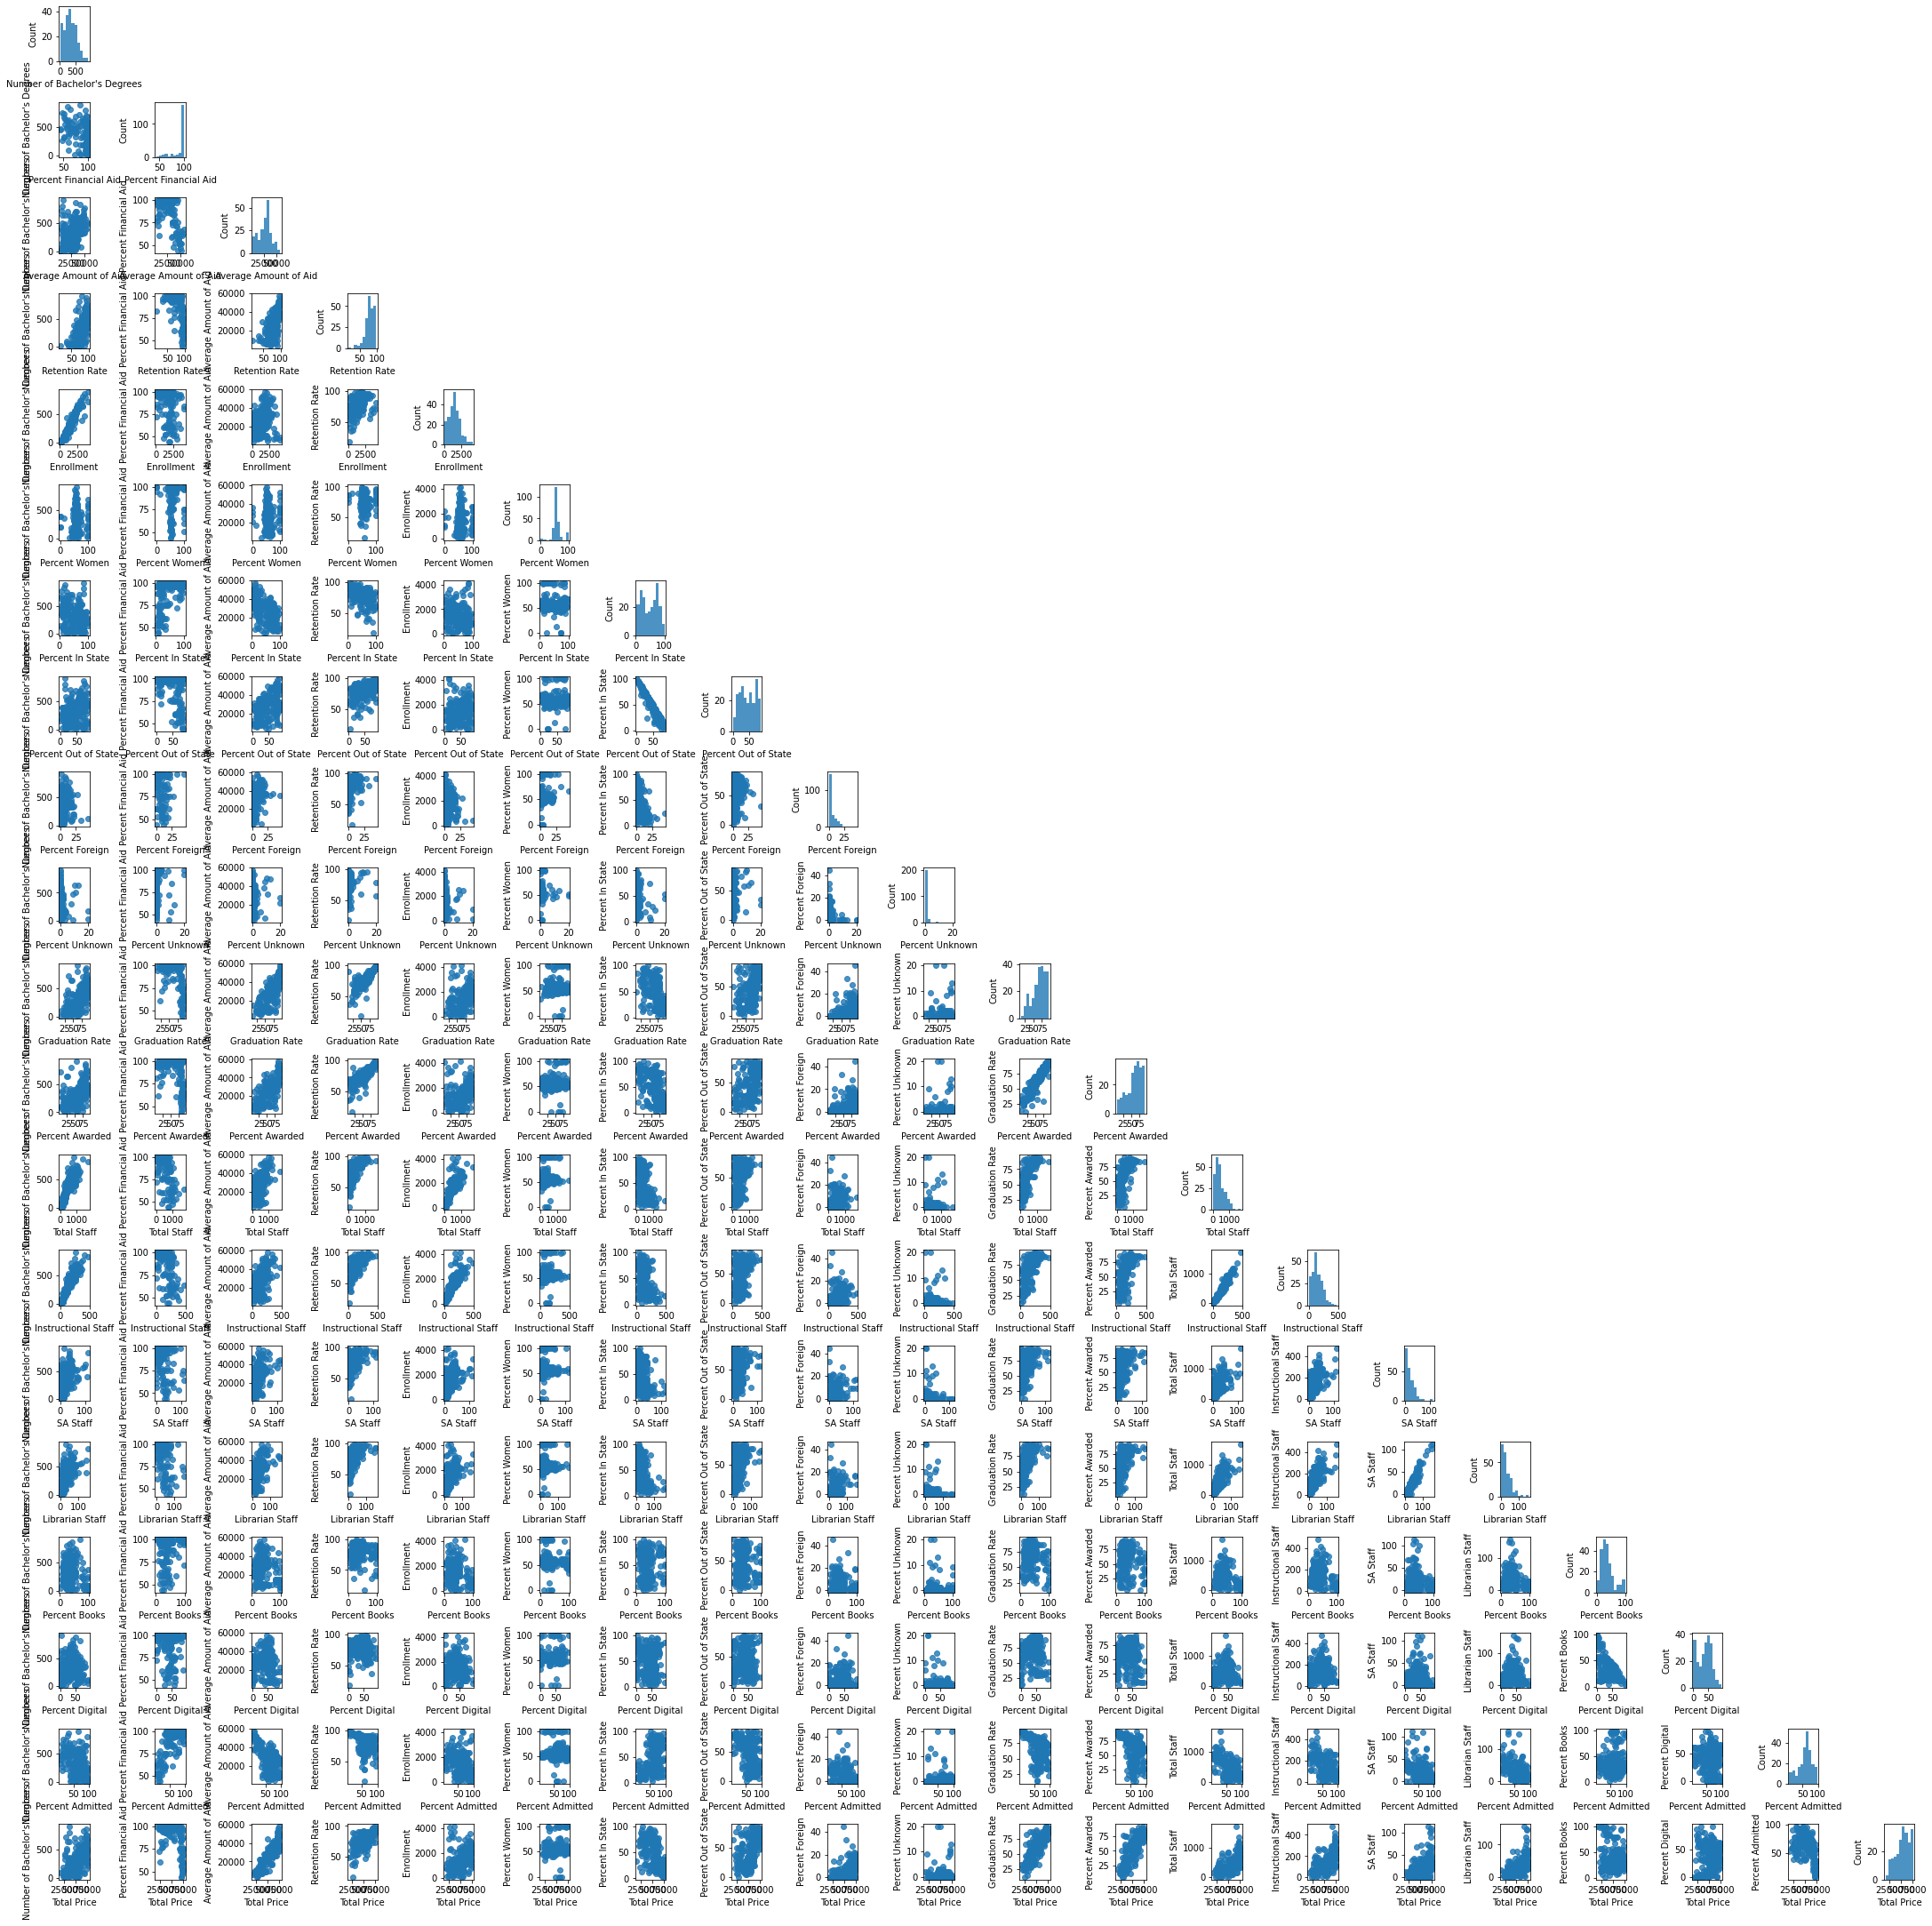

In [40]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap

columns = df.columns

scatterplotmatrix(df[columns].values, figsize=(30, 30), names=columns, alpha=0.8)
plt.tight_layout()
plt.savefig("./figs/scatterplot_matrix.png")
plt.show()
plt.close()




Correlation heatmap

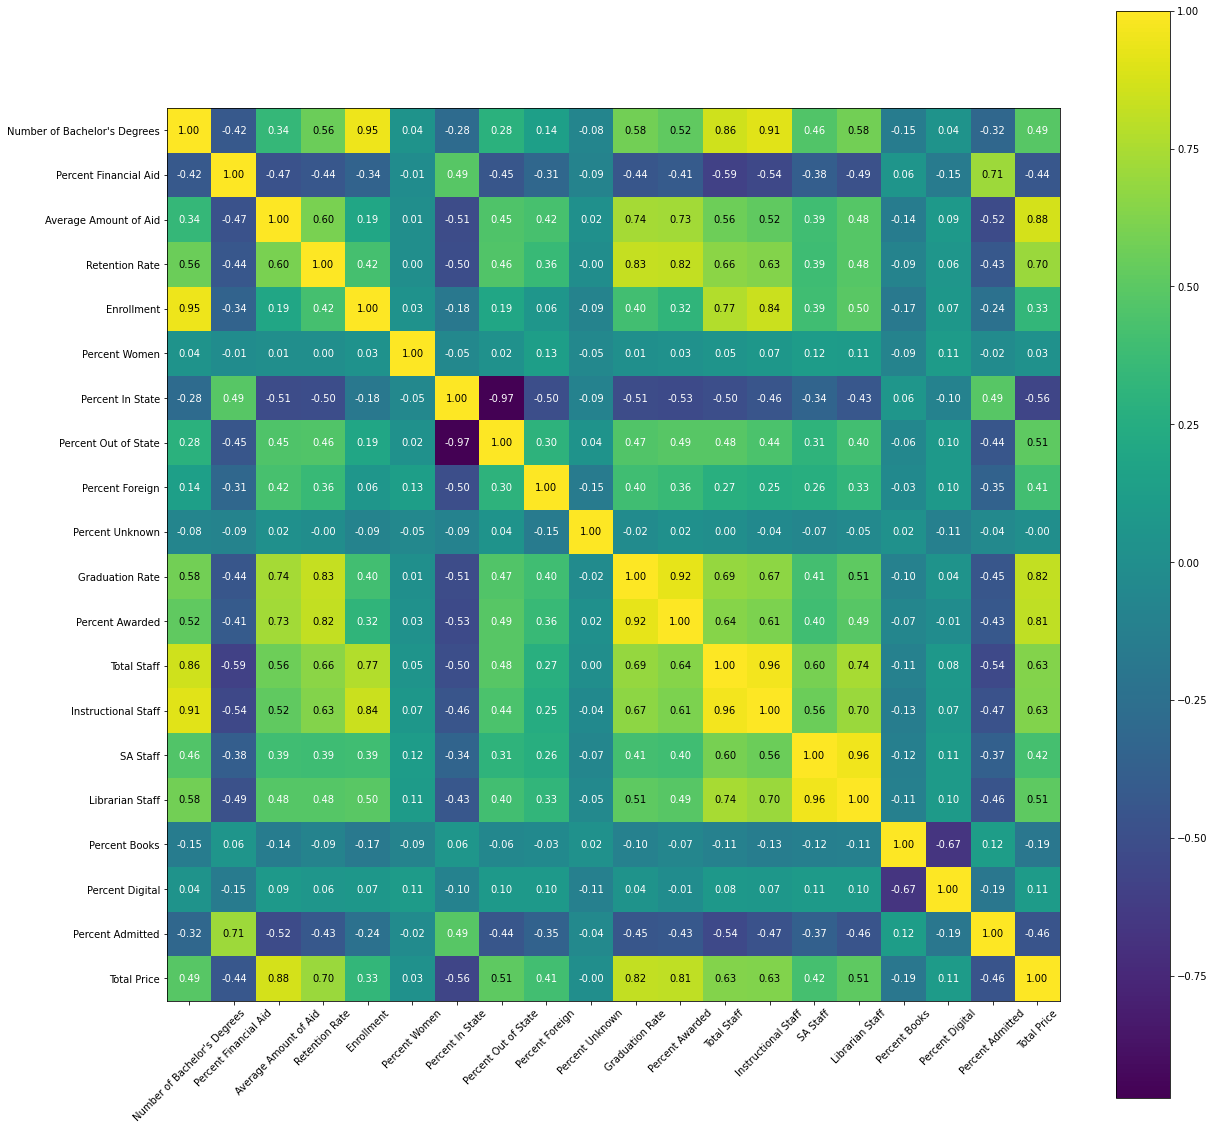

In [41]:
corrmap = np.corrcoef(df[columns].values.T)
hmap = heatmap(corrmap, row_names=columns, column_names=columns, figsize=(20, 20))
plt.savefig("./figs/heatmap.png")